In [1]:
!pip install PennyLane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 957 kB 31.8 MB/s 
     |████████████████████████████████| 1.6 MB 45.4 MB/s 
     |████████████████████████████████| 9.3 MB 16.4 MB/s 
     |████████████████████████████████| 108 kB 56.1 MB/s 


In [2]:
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

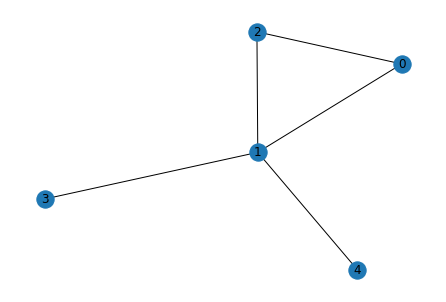

In [3]:
# edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
edges = [(0, 1), (1, 2), (2, 0), (1, 3),(1,4)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [4]:
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-0.25) [Z3]
+ (-0.25) [Z4]
+ (0.5) [Z0]
+ (0.5) [Z2]
+ (2.0) [Z1]
+ (0.75) [Z0 Z1]
+ (0.75) [Z0 Z2]
+ (0.75) [Z1 Z2]
+ (0.75) [Z1 Z3]
+ (0.75) [Z1 Z4]
Mixer Hamiltonian   (1) [X0]
+ (1) [X1]
+ (1) [X2]
+ (1) [X3]
+ (1) [X4]


In [5]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [6]:
wires = range(5)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [7]:
import pennylane as qml
dev = qml.device('default.qubit', wires=wires)
#dev = qml.device('qulacs.simulator', wires=wires, gpu=True)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [ ]:
qml.version()

'0.24.0'

In [13]:
#optimizer = qml.GradientDescentOptimizer()
optimizer = qml.AdamOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [21]:
optimizer1 = qml.GradientDescentOptimizer()
#optimizer = qml.AdamOptimizer()
steps = 70
params1 = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [15]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[0.63897491 0.93136561]
 [0.50460063 0.94637668]]


In [22]:
for i in range(steps):
    params1 = optimizer1.step(cost_function, params1)

print("Optimal Parameters")
print(params1)

Optimal Parameters
[[0.49296023 1.10762843]
 [0.57017388 0.96653061]]


In [17]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)

probs = probability_circuit(params[0], params[1])

In [23]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)

probs1 = probability_circuit(params1[0], params1[1])

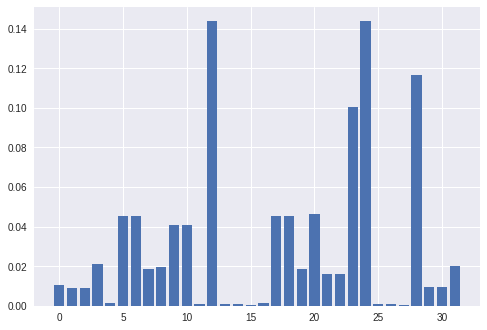

In [19]:
plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()

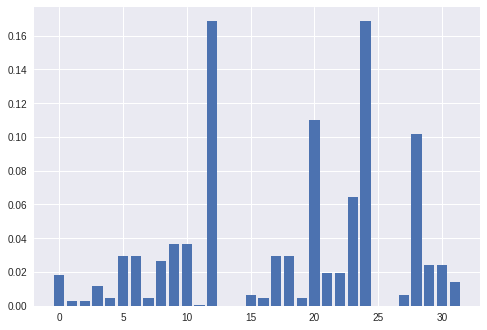

In [24]:
plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs1)
plt.show()